# Mnist

### load data and test accuracy of nearest neighbor and kmeans

In [1]:
def normal(X_mini):
    #dedomeno oti einai gray scale eikones, max(xi)=255, min(xi)=0
    X_norm = 2*(X_mini/255) - 1
    return X_norm

In [2]:
import scipy.io
import numpy as np
import torch

mat_data = scipy.io.loadmat("C:\\Users\\dimos\\PyProjecks\\Project_SVMs\\mnist_all.mat")

def load_data_mini(mat_data, key_prefix, L):
    data = []
    labels = []
    for i in range(10):
        digit_data = mat_data[f'{key_prefix}{i}']
        num_samples = min(L, digit_data.shape[0])
        sampled_data = digit_data[:num_samples]
        sampled_labels = np.full(num_samples, i)
        data.append(sampled_data)
        labels.append(sampled_labels)
    return np.vstack(data), np.hstack(labels)

X_mini, y_mini = load_data_mini(mat_data, 'train', 600)
X_test, y_test = load_data_mini(mat_data, 'test', 100)
X_mini = normal(X_mini)
X_test = normal(X_test)
X_m_t = torch.tensor(X_mini)
y_m_t = torch.tensor(y_mini)
X_test_t = torch.tensor(X_test)
y_test_t = torch.tensor(y_test)
y_m_t = y_m_t.to(torch.int32)
y_test_t = y_test_t.to(torch.int32)
print(X_m_t.shape, y_m_t.shape)
print(X_test_t.shape, y_test_t.shape)

torch.Size([6000, 784]) torch.Size([6000])
torch.Size([1000, 784]) torch.Size([1000])


Nearest Neighbor

In [3]:
from sklearn.metrics import accuracy_score
from utils_ import _models

NC = _models.NearestCentroid()
NC.fit(X_m_t, y_m_t)
# Predict the labels for the test set 
y_pred = NC.predict(X_test_t)
accuracy = accuracy_score(y_test_t.numpy(), y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 77.00%


Kmeans

In [4]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_mini, y_mini)
    score = knn.score(X_test, y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 91.70% with n_neighbors = 5


### kernel PCA

### linear

In [6]:
from utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=784, kernel_type='linear')#, gamma=a
kpca.fit(X_m_t)
X_kpca = kpca.transform(X_m_t)
X_test_kpca = kpca.transform(X_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA.py:122: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-1.9437e-01, -1.2911e-02, -1.2530e-02,  ..., -5.4617e-06,
        -3.0066e-06, -1.2677e-06])
  warnings.warn(


The shape of train after xkpca  torch.Size([6000, 784])
The shape of test after xkpca  torch.Size([1000, 784])
---- KPCA took  20330  ms----


In [7]:
explained_variance = kpca.explained_var  
explained_variance_ratio = explained_variance / torch.sum(explained_variance)

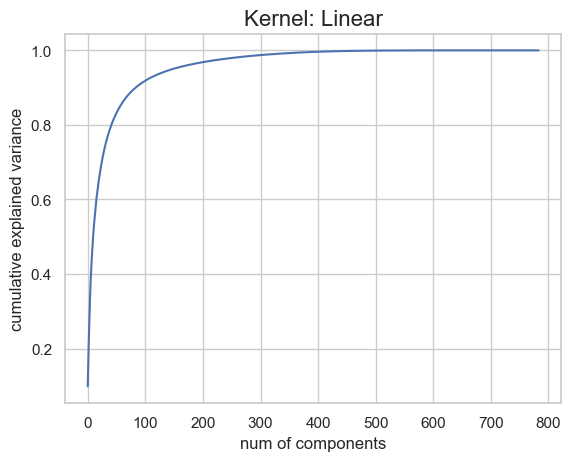

None

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
plt.plot(np.cumsum(explained_variance_ratio.numpy()))
plt.title('Kernel: Linear', fontsize=16)
plt.xlabel('num of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

In [10]:
import pandas as pd

evr = explained_variance_ratio.numpy()
crv = np.cumsum(explained_variance_ratio.numpy())
kpca_df  = pd.DataFrame()
kpca_df['cumsum_explained_var'] = crv
kpca_df['explainde_var_ratio'] = evr
display(kpca_df.head(149))

,cumsum_explained_var,explainde_var_ratio
0,0.098449,0.098449
1,0.169712,0.071263
2,0.232559,0.062847
3,0.287591,0.055032
4,0.335831,0.048240
...,...,...
144,0.948346,0.000491
145,0.948832,0.000486
146,0.949298,0.000466
147,0.949761,0.000463


n_componenets = 149, διατήρηση πληροφορίας μεγαλύτερη του 95%

In [11]:
# Get the indexes where cumsum_explained_var > 0.99
indexes = kpca_df[kpca_df['cumsum_explained_var'] > 0.99].index.tolist()

print("Indexes where cumsum_explained_var > 0.99:", indexes)

Indexes where cumsum_explained_var > 0.99: [322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 5

n_componenets = 322, διατήρηση πληροφορίας μεγαλύτερη του 99%

NC and kmean for 95% information preservation

In [23]:
from utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=148, kernel_type='linear')
kpca.fit(X_m_t)
X_kpca = kpca.transform(X_m_t)
X_test_kpca = kpca.transform(X_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA2.py:133: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-1.9437e-01, -1.2911e-02, -1.2530e-02,  ..., -5.4617e-06,
        -3.0066e-06, -1.2677e-06])
  warnings.warn(


The shape of train after xkpca  torch.Size([6000, 148])
The shape of test after xkpca  torch.Size([1000, 148])
---- KPCA took  17457  ms----


In [24]:
from sklearn.metrics import accuracy_score
from utils_ import _models

NC = _models.NearestCentroid()
NC.fit(X_kpca, y_m_t)
# Predict the labels for the test set 
y_pred = NC.predict(X_test_kpca)
accuracy = accuracy_score(y_test_t.numpy(), y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.30%


In [25]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_kpca.numpy(), y_mini)
    score = knn.score(X_test_kpca.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 92.00% with n_neighbors = 5


NC and kmean for 99% information preservation

In [15]:
from KPCA_LDA_v2.utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=322, kernel_type='linear')#, gamma=a
kpca.fit(X_m_t)
X_kpca = kpca.transform(X_m_t)
X_test_kpca = kpca.transform(X_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA2.py:133: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-1.9437e-01, -1.2911e-02, -1.2530e-02,  ..., -5.4617e-06,
        -3.0066e-06, -1.2677e-06])
  warnings.warn(


The shape of train after xkpca  torch.Size([6000, 322])
The shape of test after xkpca  torch.Size([1000, 322])
---- KPCA took  16879  ms----


In [16]:
from sklearn.metrics import accuracy_score
from utils_ import _models

NC = _models.NearestCentroid()
NC.fit(X_kpca, y_m_t)
# Predict the labels for the test set 
y_pred = NC.predict(X_test_kpca)
accuracy = accuracy_score(y_test_t.numpy(), y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.40%


In [17]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_kpca.numpy(), y_mini)
    score = knn.score(X_test_kpca.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 91.80% with n_neighbors = 6


### kPCA+LDA

95%

In [26]:
from utils_ import _lda as lda

LDA = lda.LDA()
LDA.fit(X_kpca, y_m_t)
X_lda = LDA.transform(X_kpca)
X_test_lda = LDA.transform(X_test_kpca)
X_lda.shape

c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_lda.py:145: RuntimeWarning: Negative eigenvalues encountered and removed: tensor([-4.5860e+00, -3.4839e+00, -2.8635e+00, -1.8143e+00, -1.3208e+00,
        -1.2678e+00, -9.0809e-01, -5.3442e-01, -4.2725e-01, -2.3653e-01,
        -1.6156e-01, -1.4425e-01, -1.2582e-01, -1.1199e-01, -1.0667e-01,
        -9.3705e-02, -7.7067e-02, -6.2455e-02, -5.9227e-02, -5.6207e-02,
        -4.9032e-02, -4.4379e-02, -4.0775e-02, -3.2344e-02, -3.2250e-02,
        -2.9478e-02, -2.6883e-02, -2.4792e-02, -2.1905e-02, -1.9140e-02,
        -1.8553e-02, -1.7546e-02, -1.4896e-02, -1.4319e-02, -1.2990e-02,
        -1.2476e-02, -1.1399e-02, -9.9762e-03, -9.0990e-03, -8.4775e-03,
        -8.1028e-03, -7.7825e-03, -7.4834e-03, -7.4269e-03, -6.7489e-03,
        -5.9906e-03, -5.3459e-03, -5.2800e-03, -4.9631e-03, -4.7662e-03,
        -4.3168e-03, -4.0384e-03, -3.7246e-03, -3.6314e-03, -3.4292e-03,
        -3.1222e-03, -2.9636e-03, -2.8979e-03, -2.6575e-03, -2.6133e-03,
    

torch.Size([6000, 9])

In [27]:
from utils_ import _models
from sklearn.metrics import accuracy_score

NC = _models.NearestCentroid()
NC.fit(X_lda, y_m_t)

# Predict the labels for the test set 
y_pred = NC.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 82.90%


In [28]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_lda.numpy(), y_mini)
    score = knn.score(X_test_lda.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 89.60% with n_neighbors = 8


99%

In [20]:
from utils_ import _lda as lda

LDA = lda.LDA()
LDA.fit(X_kpca, y_m_t)
X_lda = LDA.transform(X_kpca)
X_test_lda = LDA.transform(X_test_kpca)
X_lda.shape

c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_lda.py:145: RuntimeWarning: Negative eigenvalues encountered and removed: tensor([-9.2379e+00, -6.9966e+00, -5.9057e+00, -3.4418e+00, -3.0500e+00,
        -2.8544e+00, -2.0166e+00, -1.3238e+00, -1.0779e+00, -3.8912e-01,
        -2.2354e-01, -2.0945e-01, -1.9145e-01, -1.5220e-01, -1.3436e-01,
        -1.1987e-01, -1.0080e-01, -9.4583e-02, -8.3653e-02, -7.9018e-02,
        -6.8866e-02, -6.8512e-02, -5.6499e-02, -5.1026e-02, -4.6934e-02,
        -4.2715e-02, -3.9455e-02, -3.8161e-02, -3.4555e-02, -3.3081e-02,
        -3.1507e-02, -2.8482e-02, -2.4823e-02, -2.4504e-02, -2.1368e-02,
        -2.1158e-02, -1.8593e-02, -1.7736e-02, -1.5974e-02, -1.5577e-02,
        -1.4761e-02, -1.4072e-02, -1.3144e-02, -1.1934e-02, -1.1651e-02,
        -1.1021e-02, -1.0225e-02, -9.9048e-03, -9.2378e-03, -8.8619e-03,
        -8.1308e-03, -7.8513e-03, -7.4570e-03, -6.9683e-03, -6.8959e-03,
        -6.5841e-03, -6.3588e-03, -5.7302e-03, -5.5679e-03, -5.2376e-03,
    

torch.Size([6000, 9])

In [21]:
from utils_ import _models
from sklearn.metrics import accuracy_score

NC = _models.NearestCentroid()
NC.fit(X_lda, y_m_t)

# Predict the labels for the test set 
y_pred = NC.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.70%


In [22]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_lda.numpy(), y_mini)
    score = knn.score(X_test_lda.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 89.40% with n_neighbors = 8


for the 95% looking best params for svc and checking its new scores

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time 
s_time=time.time()
param_grid = [{'C':[0.05, 0.01,0.005], 'kernel':['linear']}]
grid = GridSearchCV(SVC(), param_grid, verbose=10)
grid.fit(X_lda.numpy(), y_mini)
y_pred = grid.predict(X_test_lda.numpy())
f_time = time.time()
print(f'Durratio: {f_time-s_time}')
best_params = grid.best_params_
print(best_params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START C=0.05, kernel=linear.......................................
[CV 1/5; 1/3] END ........C=0.05, kernel=linear;, score=0.877 total time=   0.0s
[CV 2/5; 1/3] START C=0.05, kernel=linear.......................................
[CV 2/5; 1/3] END ........C=0.05, kernel=linear;, score=0.906 total time=   0.0s
[CV 3/5; 1/3] START C=0.05, kernel=linear.......................................
[CV 3/5; 1/3] END ........C=0.05, kernel=linear;, score=0.900 total time=   0.0s
[CV 4/5; 1/3] START C=0.05, kernel=linear.......................................
[CV 4/5; 1/3] END ........C=0.05, kernel=linear;, score=0.898 total time=   0.0s
[CV 5/5; 1/3] START C=0.05, kernel=linear.......................................
[CV 5/5; 1/3] END ........C=0.05, kernel=linear;, score=0.908 total time=   0.0s
[CV 1/5; 2/3] START C=0.01, kernel=linear.......................................
[CV 1/5; 2/3] END ........C=0.01, kernel=linear;,

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time 
s_time=time.time()
param_grid = [{'C':[0.01, 0.1, 1, 2.5, 5], 'gamma':[2.5e-02, 5e-02, 7.5e-02], 'kernel':['rbf']},
            {'C':[0.01, 0.05, 0.01,0.005, 0.001], 'kernel':['linear']}]
grid = GridSearchCV(SVC(), param_grid, verbose=10)
grid.fit(X_lda.numpy(), y_mini)
y_pred = grid.predict(X_test_lda.numpy())
f_time = time.time()
print(f'Durratio: {f_time-s_time}')
best_params = grid.best_params_
print(best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START C=0.01, gamma=0.025, kernel=rbf............................
[CV 1/5; 1/20] END C=0.01, gamma=0.025, kernel=rbf;, score=0.862 total time=   0.6s
[CV 2/5; 1/20] START C=0.01, gamma=0.025, kernel=rbf............................
[CV 2/5; 1/20] END C=0.01, gamma=0.025, kernel=rbf;, score=0.882 total time=   0.6s
[CV 3/5; 1/20] START C=0.01, gamma=0.025, kernel=rbf............................
[CV 3/5; 1/20] END C=0.01, gamma=0.025, kernel=rbf;, score=0.881 total time=   0.6s
[CV 4/5; 1/20] START C=0.01, gamma=0.025, kernel=rbf............................
[CV 4/5; 1/20] END C=0.01, gamma=0.025, kernel=rbf;, score=0.877 total time=   0.6s
[CV 5/5; 1/20] START C=0.01, gamma=0.025, kernel=rbf............................
[CV 5/5; 1/20] END C=0.01, gamma=0.025, kernel=rbf;, score=0.891 total time=   0.6s
[CV 1/5; 2/20] START C=0.01, gamma=0.05, kernel=rbf.............................
[CV 1/5; 2/20] END C=0.01, gamma

In [41]:
from sklearn import metrics
print(f'Accuracy: {metrics.accuracy_score(y_true=y_test, y_pred = y_pred)}')

Accuracy: 0.902


### 'poly' kernel

In [9]:
from utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=784, kernel_type='poly')
kpca.fit(X_m_t)
X_kpca = kpca.transform(X_m_t)
X_test_kpca = kpca.transform(X_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA.py:122: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-26323.2520])
  warnings.warn(


The shape of train after xkpca  torch.Size([6000, 784])
The shape of test after xkpca  torch.Size([1000, 784])
---- KPCA took  21747  ms----


In [10]:
explained_variance = kpca.explained_var  
explained_variance_ratio = explained_variance / torch.sum(explained_variance)

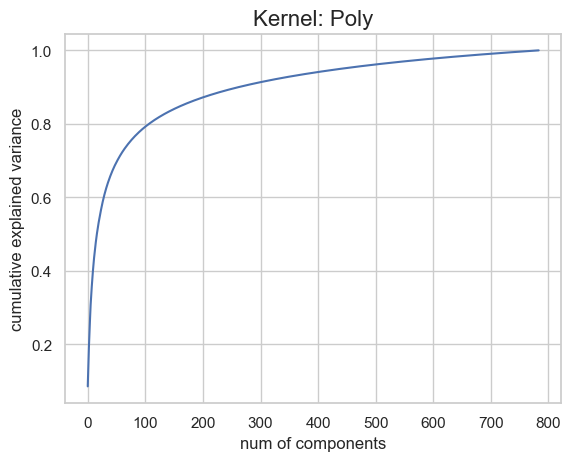

None

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
plt.plot(np.cumsum(explained_variance_ratio.numpy()))
plt.title('Kernel: Poly', fontsize=16)
plt.xlabel('num of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

In [47]:
import pandas as pd

evr = explained_variance_ratio.numpy()
crv = np.cumsum(explained_variance_ratio.numpy())
kpca_df  = pd.DataFrame()
kpca_df['cumsum_explained_var'] = crv
kpca_df['explainde_var_ratio'] = evr

In [48]:
# Get the indexes where cumsum_explained_var > 0.95
indexes = kpca_df[kpca_df['cumsum_explained_var'] > 0.95].index.tolist()

print("Indexes where cumsum_explained_var > 0.95:", indexes)

Indexes where cumsum_explained_var > 0.95: [440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 6

n_componenets = 440, διατήρηση πληροφορίας μεγαλύτερη του 95%

In [49]:
# Get the indexes where cumsum_explained_var > 0.99
indexes = kpca_df[kpca_df['cumsum_explained_var'] > 0.99].index.tolist()

print("Indexes where cumsum_explained_var > 0.95:", indexes)

Indexes where cumsum_explained_var > 0.95: [694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783]


n_componenets = 694, διατήρηση πληροφορίας μεγαλύτερη του 99%

NC and kmean for 95% information preservation

In [ ]:
from KPCA_LDA_v2.utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=440, kernel_type='poly')#, gamma=a
kpca.fit(X_m_t)
X_kpca = kpca.transform(X_m_t)
X_test_kpca = kpca.transform(X_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA2.py:133: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-26323.2520])
  warnings.warn(


The shape of train after xkpca  torch.Size([6000, 440])
The shape of test after xkpca  torch.Size([1000, 440])
---- KPCA took  17055  ms----


In [51]:
from sklearn.metrics import accuracy_score
from utils_ import _models

NC = _models.NearestCentroid()
NC.fit(X_kpca, y_m_t)
# Predict the labels for the test set 
y_pred = NC.predict(X_test_kpca)
accuracy = accuracy_score(y_test_t.numpy(), y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 79.70%


In [52]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,20):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_kpca.numpy(), y_mini)
    score = knn.score(X_test_kpca.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,20,2)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 94.00% with n_neighbors = 11


NC and kmean for 99% information preservation

In [ ]:
from KPCA_LDA_v2.utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=694, kernel_type='linear')#, gamma=a
kpca.fit(X_m_t)
X_kpca = kpca.transform(X_m_t)
X_test_kpca = kpca.transform(X_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA2.py:133: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-1.9437e-01, -1.2911e-02, -1.2530e-02,  ..., -5.4617e-06,
        -3.0066e-06, -1.2677e-06])
  warnings.warn(


The shape of train after xkpca  torch.Size([6000, 694])
The shape of test after xkpca  torch.Size([1000, 694])
---- KPCA took  16293  ms----


In [61]:
from sklearn.metrics import accuracy_score
from utils_ import _models

NC = _models.NearestCentroid()
NC.fit(X_kpca, y_m_t)
# Predict the labels for the test set 
y_pred = NC.predict(X_test_kpca)
accuracy = accuracy_score(y_test_t.numpy(), y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.40%


In [62]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,20):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_kpca.numpy(), y_mini)
    score = knn.score(X_test_kpca.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,20,2)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 91.90% with n_neighbors = 11


### KPCA+LDA poly

95%

In [53]:
from utils_ import _lda as lda

LDA = lda.LDA()
LDA.fit(X_kpca, y_m_t)
X_lda = LDA.transform(X_kpca)
X_test_lda = LDA.transform(X_test_kpca)
X_lda.shape

c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_lda.py:145: RuntimeWarning: Negative eigenvalues encountered and removed: tensor([-3.3154e+01, -2.0128e+01, -1.5479e+01, -1.5194e+01, -1.0360e+01,
        -7.6657e+00, -6.5616e+00, -4.1438e+00, -3.1188e+00, -1.4459e+00,
        -9.2609e-01, -6.9975e-01, -5.7112e-01, -5.0555e-01, -4.7925e-01,
        -4.5175e-01, -3.6588e-01, -3.3553e-01, -3.1828e-01, -3.0124e-01,
        -2.6041e-01, -2.3899e-01, -2.2338e-01, -2.1546e-01, -2.0085e-01,
        -1.8050e-01, -1.6663e-01, -1.4817e-01, -1.3563e-01, -1.3406e-01,
        -1.2728e-01, -1.1382e-01, -1.0906e-01, -1.0187e-01, -9.8419e-02,
        -8.7297e-02, -8.1824e-02, -7.3538e-02, -6.9024e-02, -6.7048e-02,
        -6.4903e-02, -6.3022e-02, -5.9595e-02, -5.5683e-02, -5.2395e-02,
        -5.0253e-02, -4.7387e-02, -4.5549e-02, -4.4549e-02, -4.0849e-02,
        -4.0517e-02, -3.8911e-02, -3.7354e-02, -3.5606e-02, -3.3149e-02,
        -3.0670e-02, -2.9977e-02, -2.9212e-02, -2.7342e-02, -2.6399e-02,
    

torch.Size([6000, 9])

In [54]:
from utils_ import _models
from sklearn.metrics import accuracy_score

NC = _models.NearestCentroid()
NC.fit(X_lda, y_m_t)

# Predict the labels for the test set 
y_pred = NC.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.70%


In [55]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_lda.numpy(), y_mini)
    score = knn.score(X_test_lda.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 91.00% with n_neighbors = 12


99%

In [63]:
from utils_ import _lda as lda

LDA = lda.LDA()
LDA.fit(X_kpca, y_m_t)
X_lda = LDA.transform(X_kpca)
X_test_lda = LDA.transform(X_test_kpca)
X_lda.shape

c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_lda.py:145: RuntimeWarning: Negative eigenvalues encountered and removed: tensor([-2.5614e+03, -2.0996e+03, -2.0213e+03, -1.3467e+03, -8.1483e+02,
        -5.4664e+02, -4.1029e+02, -3.1393e+02, -1.9730e+02, -5.9180e-01,
        -5.8240e-01, -4.0850e-01, -3.6970e-01, -3.2839e-01, -3.0828e-01,
        -2.9320e-01, -2.3805e-01, -2.3234e-01, -2.1724e-01, -1.9771e-01,
        -1.6634e-01, -1.5855e-01, -1.4904e-01, -1.4340e-01, -1.3023e-01,
        -1.2403e-01, -1.1995e-01, -1.1373e-01, -1.1003e-01, -9.9499e-02,
        -9.5390e-02, -9.0544e-02, -8.2490e-02, -8.0133e-02, -7.4657e-02,
        -7.4651e-02, -7.2032e-02, -6.7918e-02, -6.7885e-02, -6.7679e-02,
        -6.1572e-02, -5.9500e-02, -5.4701e-02, -5.4330e-02, -5.1211e-02,
        -5.0014e-02, -4.6499e-02, -4.5802e-02, -4.4953e-02, -4.4706e-02,
        -4.1169e-02, -3.9901e-02, -3.9148e-02, -3.6472e-02, -3.5528e-02,
        -3.4540e-02, -3.4087e-02, -3.1431e-02, -3.1018e-02, -3.0189e-02,
    

torch.Size([6000, 9])

In [64]:
from utils_ import _models
from sklearn.metrics import accuracy_score

NC = _models.NearestCentroid()
NC.fit(X_lda, y_m_t)

# Predict the labels for the test set 
y_pred = NC.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.50%


In [65]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,20):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_lda.numpy(), y_mini)
    score = knn.score(X_test_lda.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,20,2)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 88.30% with n_neighbors = 11


for the 95% looking best params for svc and checking its new scores

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time 
s_time=time.time()
param_grid = [{'C':[5, 7.5,10], 'gamma':[7e-20, 8e-20, 9e-20, 1e-19,3e-19], 'kernel':['rbf']}]
grid = GridSearchCV(SVC(), param_grid, verbose=10)
grid.fit(X_lda.numpy(), y_mini)
y_pred = grid.predict(X_test_lda.numpy())
f_time = time.time()
print(f'Durratio: {f_time-s_time}')
best_params = grid.best_params_
print(best_params)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START C=5, gamma=7e-20, kernel=rbf...............................
[CV 1/5; 1/15] END C=5, gamma=7e-20, kernel=rbf;, score=0.869 total time=   0.7s
[CV 2/5; 1/15] START C=5, gamma=7e-20, kernel=rbf...............................
[CV 2/5; 1/15] END C=5, gamma=7e-20, kernel=rbf;, score=0.899 total time=   0.7s
[CV 3/5; 1/15] START C=5, gamma=7e-20, kernel=rbf...............................
[CV 3/5; 1/15] END C=5, gamma=7e-20, kernel=rbf;, score=0.902 total time=   0.7s
[CV 4/5; 1/15] START C=5, gamma=7e-20, kernel=rbf...............................
[CV 4/5; 1/15] END C=5, gamma=7e-20, kernel=rbf;, score=0.883 total time=   0.7s
[CV 5/5; 1/15] START C=5, gamma=7e-20, kernel=rbf...............................
[CV 5/5; 1/15] END C=5, gamma=7e-20, kernel=rbf;, score=0.905 total time=   0.7s
[CV 1/5; 2/15] START C=5, gamma=8e-20, kernel=rbf...............................
[CV 1/5; 2/15] END C=5, gamma=8e-20, kernel=rbf;

In [59]:
from sklearn import metrics
print(f'Accuracy: {metrics.accuracy_score(y_true=y_test, y_pred = y_pred)}')

Accuracy: 0.845


## 'rbf' kernel

### kPCA

In [12]:
#the auto gamma in sklearn
a = 1 / X_m_t.shape[1]
g = 2.5e-04
print(g)
print(a-g)

0.00025
0.0010255102040816325


In [13]:
from utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=784, kernel_type='rbf', gamma=g)
kpca.fit(X_m_t)
X_kpca = kpca.transform(X_m_t)
X_test_kpca = kpca.transform(X_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA.py:122: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-2.0762e-05])
  warnings.warn(


The shape of train after xkpca  torch.Size([6000, 784])
The shape of test after xkpca  torch.Size([1000, 784])
---- KPCA took  21414  ms----


In [16]:
explained_variance = kpca.explained_var  
explained_variance_ratio = explained_variance / torch.sum(explained_variance)

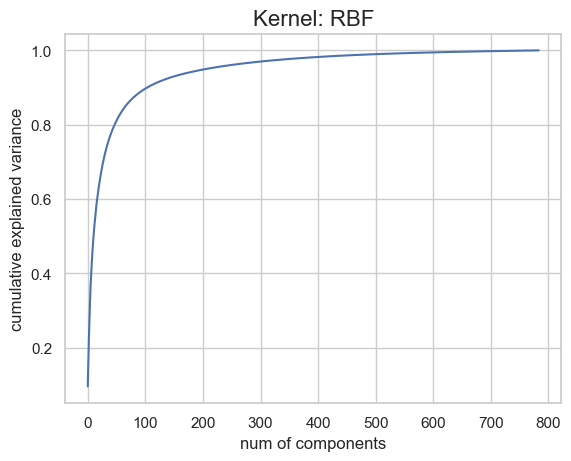

None

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
plt.plot(np.cumsum(explained_variance_ratio.numpy()))
plt.title('Kernel: RBF', fontsize=16)
plt.xlabel('num of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

In [111]:
import pandas as pd

evr = explained_variance_ratio.numpy()
crv = np.cumsum(explained_variance_ratio.numpy())
kpca_df  = pd.DataFrame()
kpca_df['cumsum_explained_var'] = crv
kpca_df['explainde_var_ratio'] = evr

In [112]:
# Get the indexes where cumsum_explained_var > 0.95
indexes = kpca_df[kpca_df['cumsum_explained_var'] > 0.95].index.tolist()

print("Indexes where cumsum_explained_var > 0.95:", indexes)

Indexes where cumsum_explained_var > 0.95: [206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 3

In [114]:
# Get the indexes where cumsum_explained_var > 0.99
indexes = kpca_df[kpca_df['cumsum_explained_var'] > 0.99].index.tolist()

print("Indexes where cumsum_explained_var > 0.95:", indexes)

Indexes where cumsum_explained_var > 0.95: [503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 6

n_components = 206, για διατήρηση πληροφορίας στο 95%,

n_components = 503, για διατήρηση πληροφορίας στο 99%

95%

In [ ]:
from KPCA_LDA_v2.utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=206, kernel_type='rbf', gamma=g)#, gamma=a
kpca.fit(X_m_t)
X_kpca = kpca.transform(X_m_t)
X_test_kpca = kpca.transform(X_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA2.py:133: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-2.0762e-05])
  warnings.warn(


The shape of train after xkpca  torch.Size([6000, 206])
The shape of test after xkpca  torch.Size([1000, 206])
---- KPCA took  17231  ms----


In [117]:
from sklearn.metrics import accuracy_score
from utils_ import _models

NC = _models.NearestCentroid()
NC.fit(X_kpca, y_m_t)
# Predict the labels for the test set 
y_pred = NC.predict(X_test_kpca)
accuracy = accuracy_score(y_test_t.numpy(), y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.60%


In [118]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_kpca.numpy(), y_mini)
    score = knn.score(X_test_kpca.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 92.10% with n_neighbors = 6


In [119]:
from utils_ import _lda as lda

LDA = lda.LDA()
LDA.fit(X_kpca, y_m_t)
X_lda = LDA.transform(X_kpca)
X_test_lda = LDA.transform(X_test_kpca)
X_lda.shape

c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_lda.py:145: RuntimeWarning: Negative eigenvalues encountered and removed: tensor([-1.6186e+01, -8.5225e+00, -7.4745e+00, -5.5414e+00, -4.6040e+00,
        -3.5343e+00, -1.9406e+00, -1.7226e+00, -1.2656e+00, -5.9917e-01,
        -2.6970e-01, -2.3029e-01, -2.2803e-01, -1.9029e-01, -1.5935e-01,
        -1.4978e-01, -1.1982e-01, -1.1096e-01, -9.9470e-02, -9.4367e-02,
        -8.7149e-02, -7.7798e-02, -7.0951e-02, -6.2203e-02, -5.7717e-02,
        -5.3640e-02, -5.0112e-02, -4.8509e-02, -4.4744e-02, -4.0019e-02,
        -3.8084e-02, -3.4430e-02, -3.1831e-02, -3.0769e-02, -2.8215e-02,
        -2.6114e-02, -2.4435e-02, -2.2101e-02, -2.1156e-02, -1.9730e-02,
        -1.7815e-02, -1.7181e-02, -1.6335e-02, -1.5933e-02, -1.4848e-02,
        -1.4158e-02, -1.2557e-02, -1.2078e-02, -1.1381e-02, -1.1297e-02,
        -1.0715e-02, -1.0062e-02, -9.4562e-03, -8.8167e-03, -8.6751e-03,
        -8.4825e-03, -8.2881e-03, -8.0380e-03, -7.1950e-03, -6.6016e-03,
    

torch.Size([6000, 9])

In [120]:
from utils_ import _models
from sklearn.metrics import accuracy_score

NC = _models.NearestCentroid()
NC.fit(X_lda, y_m_t)

# Predict the labels for the test set 
y_pred = NC.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 82.70%


In [121]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_lda.numpy(), y_mini)
    score = knn.score(X_test_lda.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 89.50% with n_neighbors = 4


99%

In [ ]:
from KPCA_LDA_v2.utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=503, kernel_type='rbf', gamma=g)#, gamma=a
kpca.fit(X_m_t)
X_kpca = kpca.transform(X_m_t)
X_test_kpca = kpca.transform(X_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA2.py:133: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-2.0762e-05])
  warnings.warn(


The shape of train after xkpca  torch.Size([6000, 503])
The shape of test after xkpca  torch.Size([1000, 503])
---- KPCA took  16219  ms----


In [135]:
from sklearn.metrics import accuracy_score
from utils_ import _models

NC = _models.NearestCentroid()
NC.fit(X_kpca, y_m_t)
# Predict the labels for the test set 
y_pred = NC.predict(X_test_kpca)
accuracy = accuracy_score(y_test_t.numpy(), y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.70%


In [136]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_kpca.numpy(), y_mini)
    score = knn.score(X_test_kpca.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 92.10% with n_neighbors = 6


In [137]:
from utils_ import _lda as lda

LDA = lda.LDA()
LDA.fit(X_kpca, y_m_t)
X_lda = LDA.transform(X_kpca)
X_test_lda = LDA.transform(X_test_kpca)
X_lda.shape

c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_lda.py:145: RuntimeWarning: Negative eigenvalues encountered and removed: tensor([-6.7486e+01, -4.0853e+01, -3.3333e+01, -3.0078e+01, -2.2056e+01,
        -1.5202e+01, -1.2732e+01, -9.3434e+00, -5.9945e+00, -1.2093e+00,
        -7.7163e-01, -5.9711e-01, -4.5329e-01, -4.3415e-01, -3.9629e-01,
        -3.6384e-01, -3.3782e-01, -2.9966e-01, -2.6853e-01, -2.4653e-01,
        -2.3556e-01, -2.1392e-01, -2.0310e-01, -1.8415e-01, -1.7808e-01,
        -1.6975e-01, -1.5620e-01, -1.3981e-01, -1.3494e-01, -1.2533e-01,
        -1.1459e-01, -1.1303e-01, -1.0114e-01, -1.0071e-01, -9.2483e-02,
        -8.7421e-02, -8.4064e-02, -7.7596e-02, -7.6042e-02, -7.2530e-02,
        -6.8400e-02, -6.5674e-02, -5.9762e-02, -5.9020e-02, -5.6430e-02,
        -5.4529e-02, -5.1371e-02, -5.0288e-02, -4.6433e-02, -4.3652e-02,
        -4.2352e-02, -3.9254e-02, -3.8680e-02, -3.6999e-02, -3.5814e-02,
        -3.4219e-02, -3.2148e-02, -3.0766e-02, -2.9425e-02, -2.7963e-02,
    

torch.Size([6000, 9])

In [138]:
from utils_ import _models
from sklearn.metrics import accuracy_score

NC = _models.NearestCentroid()
NC.fit(X_lda, y_m_t)

# Predict the labels for the test set 
y_pred = NC.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 82.00%


In [139]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_lda.numpy(), y_mini)
    score = knn.score(X_test_lda.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 89.00% with n_neighbors = 8


for the 95% looking best params for svc and checking its new scores

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time 
s_time=time.time()
param_grid = [{'C':[1, 2.5], 'gamma':[0.01], 'kernel':['rbf']}] #{'C':[0.01,0.001,0.0001], 'kernel':['linear']}
grid = GridSearchCV(SVC(), param_grid, verbose=1)
grid.fit(X_lda.numpy(), y_mini)
y_pred = grid.predict(X_test_lda.numpy())
f_time = time.time()
print(f'Durratio: {f_time-s_time}')
best_params = grid.best_params_
print(best_params)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Durratio: 11.577696561813354
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [132]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time 
s_time=time.time()
param_grid = [{'C':[1, 2.5, 5], 'gamma':[65, 70,75], 'kernel':['rbf']}] #{'C':[0.01,0.001,0.0001], 'kernel':['linear']}
grid = GridSearchCV(SVC(), param_grid, verbose=1)
grid.fit(X_lda.numpy(), y_mini)
y_pred = grid.predict(X_test_lda.numpy())
f_time = time.time()
print(f'Durratio: {f_time-s_time}')
best_params = grid.best_params_
print(best_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Durratio: 8.383292436599731
{'C': 2.5, 'gamma': 70, 'kernel': 'rbf'}


In [133]:
from sklearn import metrics
print(f'Accuracy: {metrics.accuracy_score(y_true=y_test, y_pred = y_pred)}')

Accuracy: 0.899


## Cifar-10

In [18]:
import tensorflow as tf 
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Shape of x_train:", x_train.shape) 
print("Shape of y_train:", y_train.shape) 
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [19]:
def normal(X_mini):
    #dedomeno oti einai eikones, max(xi)=255, min(xi)=0
    X_norm = 2*(X_mini/255) - 1
    return X_norm

In [20]:
import torch

x_train_mini = x_train[0:5000]
y_train_mini = y_train[0:5000]
x_test_mini = x_test[0:1000]
y_test_mini = y_test[0:1000]
x_train_mini =normal(x_train_mini)
x_test_mini = normal(x_test_mini)
x_train_m = x_train_mini.reshape(x_train_mini.shape[0], -1)
y_train_m = y_train_mini.reshape(y_train_mini.shape[0])
x_test = x_test_mini.reshape(x_test_mini.shape[0], -1)
y_test = y_test_mini.reshape(y_test_mini.shape[0])
x_train_t =torch.tensor(x_train_m)
y_train_t =torch.tensor(y_train_m)
x_test_t =torch.tensor(x_test)
y_test_t = torch.tensor(y_test)
y_train_t = y_train_t.to(torch.int32)
y_test_t = y_test_t.to(torch.int32)
print(x_train_t.shape, y_train_t.shape)
print(x_test_t.shape, y_test_t.shape)

torch.Size([5000, 3072]) torch.Size([5000])
torch.Size([1000, 3072]) torch.Size([1000])


In [21]:
from sklearn.metrics import accuracy_score
from utils_ import _models

NC = _models.NearestCentroid()
NC.fit(x_train_t, y_train_t)
# Predict the labels for the test set 
y_pred = NC.predict(x_test_t)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 29.10%


In [22]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(x_train_m, y_train_m)
    score = knn.score(x_test, y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 27.70% with n_neighbors = 10


## kernel PCA

#### linear

In [23]:
from utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=3072, kernel_type='linear')#, gamma=a
kpca.fit(x_train_t)
X_kpca = kpca.transform(x_train_t)
X_test_kpca = kpca.transform(x_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA.py:122: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-4.0595e-02, -1.4052e-02, -1.2697e-02,  ..., -5.9759e-06,
        -5.5197e-06, -2.2051e-06])
  warnings.warn(


The shape of train after xkpca  torch.Size([5000, 3072])
The shape of test after xkpca  torch.Size([1000, 3072])
---- KPCA took  11034  ms----


In [24]:
explained_variance = kpca.explained_var  
explained_variance_ratio = explained_variance / torch.sum(explained_variance)

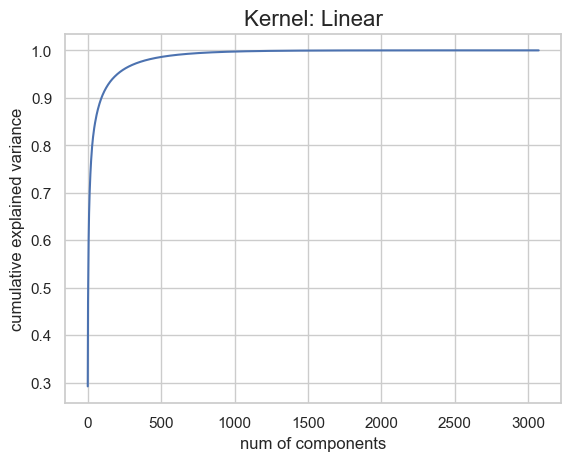

None

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style='whitegrid')
plt.plot(np.cumsum(explained_variance_ratio.numpy()))
plt.title('Kernel: Linear', fontsize=16)
plt.xlabel('num of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

In [150]:
import pandas as pd

evr = explained_variance_ratio.numpy()
crv = np.cumsum(explained_variance_ratio.numpy())
kpca_df  = pd.DataFrame()
kpca_df['cumsum_explained_var'] = crv
kpca_df['explainde_var_ratio'] = evr

In [151]:
# Get the indexes where cumsum_explained_var > 0.95
indexes = kpca_df[kpca_df['cumsum_explained_var'] > 0.95].index.tolist()

print("Indexes where cumsum_explained_var > 0.95:", indexes)

Indexes where cumsum_explained_var > 0.95: [202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 3

In [152]:
# Get the indexes where cumsum_explained_var > 0.99
indexes = kpca_df[kpca_df['cumsum_explained_var'] > 0.99].index.tolist()

print("Indexes where cumsum_explained_var > 0.99:", indexes)

Indexes where cumsum_explained_var > 0.99: [591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 7

n_componenets = 202, διατήρηση πληροφορίας μεγαλύτερη του 95%

n_componenets = 591, διατήρηση πληροφορίας μεγαλύτερη του 99%

95%

In [ ]:
from KPCA_LDA_v2.utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=202, kernel_type='linear')#, gamma=a
kpca.fit(x_train_t)
X_kpca = kpca.transform(x_train_t)
X_test_kpca = kpca.transform(x_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA2.py:133: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-4.0595e-02, -1.4052e-02, -1.2697e-02,  ..., -5.9759e-06,
        -5.5197e-06, -2.2051e-06])
  warnings.warn(


The shape of train after xkpca  torch.Size([5000, 202])
The shape of test after xkpca  torch.Size([1000, 202])
---- KPCA took  10018  ms----


In [154]:
from sklearn.metrics import accuracy_score
from utils_ import _models

NC = _models.NearestCentroid()
NC.fit(X_kpca, y_train_t)
# Predict the labels for the test set 
y_pred = NC.predict(X_test_kpca)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 28.40%


In [155]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_kpca.numpy(), y_train_m)
    score = knn.score(X_test_kpca.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 29.90% with n_neighbors = 20


99%

In [32]:
from KPCA_LDA_v2.utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=591, kernel_type='linear')#, gamma=a
kpca.fit(x_train_t)
X_kpca = kpca.transform(x_train_t)
X_test_kpca = kpca.transform(x_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA2.py:172: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-1.4483e+04, -5.5531e+02, -4.8177e+02,  ..., -1.0987e+00,
        -9.3363e-01, -9.0945e-01])
  warnings.warn(


The shape of train after xkpca  torch.Size([5000, 591])
The shape of test after xkpca  torch.Size([1000, 591])
---- KPCA took  10089  ms----


In [33]:
from sklearn.metrics import accuracy_score
from utils_ import _models

NC = _models.NearestCentroid()
NC.fit(X_kpca, y_train_t)
# Predict the labels for the test set 
y_pred = NC.predict(X_test_kpca)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 28.30%


In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_kpca.numpy(), y_train_m)
    score = knn.score(X_test_kpca.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 28.00% with n_neighbors = 10


### kPCA+LDA

95%

In [156]:
from utils_ import _lda as lda

LDA = lda.LDA()
LDA.fit(X_kpca, y_train_t)
X_lda = LDA.transform(X_kpca)
X_test_lda = LDA.transform(X_test_kpca)
X_lda.shape

c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_lda.py:145: RuntimeWarning: Negative eigenvalues encountered and removed: tensor([-2.8517e+00, -1.0658e+00, -7.3876e-01, -3.0565e-01, -2.4907e-01,
        -1.8172e-01, -1.4698e-01, -1.1717e-01, -8.8750e-02, -5.1674e-02,
        -4.4326e-02, -3.2043e-02, -3.1391e-02, -2.1657e-02, -1.7947e-02,
        -1.5311e-02, -1.2084e-02, -1.0469e-02, -8.4806e-03, -8.1109e-03,
        -7.8696e-03, -6.6883e-03, -6.0041e-03, -5.5285e-03, -4.9387e-03,
        -4.6673e-03, -4.2084e-03, -3.9125e-03, -3.7378e-03, -3.6386e-03,
        -3.1519e-03, -3.1045e-03, -2.7327e-03, -2.7010e-03, -2.3433e-03,
        -2.2986e-03, -2.0764e-03, -2.0289e-03, -1.9491e-03, -1.8358e-03,
        -1.6858e-03, -1.6246e-03, -1.5360e-03, -1.4840e-03, -1.3109e-03,
        -1.2377e-03, -1.1785e-03, -1.1721e-03, -1.0497e-03, -1.0044e-03,
        -9.6300e-04, -9.4361e-04, -8.8310e-04, -8.3172e-04, -7.9915e-04,
        -7.6262e-04, -7.5127e-04, -7.0053e-04, -6.8945e-04, -6.4225e-04,
    

torch.Size([5000, 9])

In [157]:
from utils_ import _models
from sklearn.metrics import accuracy_score

NC = _models.NearestCentroid()
NC.fit(X_lda, y_train_t)

# Predict the labels for the test set 
y_pred = NC.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 30.20%


In [158]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_lda.numpy(), y_train_m)
    score = knn.score(X_test_lda.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 34.50% with n_neighbors = 17


99%

In [36]:
from utils_ import _lda as lda

LDA = lda.LDA()
LDA.fit(X_kpca, y_train_t)
X_lda = LDA.transform(X_kpca)
X_test_lda = LDA.transform(X_test_kpca)
X_lda.shape

c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_lda.py:145: RuntimeWarning: Negative eigenvalues encountered and removed: tensor([-1.1309e+01, -5.0631e+00, -2.8031e+00, -1.2844e+00, -1.1516e+00,
        -7.7264e-01, -6.4238e-01, -5.9244e-01, -3.2445e-01, -1.0564e-01,
        -9.0766e-02, -7.1456e-02, -5.7198e-02, -5.0669e-02, -3.8034e-02,
        -3.6884e-02, -3.2431e-02, -3.0961e-02, -2.8390e-02, -2.6660e-02,
        -2.4736e-02, -2.2402e-02, -1.9892e-02, -1.7624e-02, -1.6347e-02,
        -1.4573e-02, -1.2859e-02, -1.2219e-02, -1.1596e-02, -1.0913e-02,
        -1.0186e-02, -9.1570e-03, -8.9627e-03, -8.5553e-03, -8.2825e-03,
        -7.6357e-03, -7.3652e-03, -6.6226e-03, -6.3566e-03, -6.0241e-03,
        -5.4203e-03, -5.3069e-03, -5.0070e-03, -4.8608e-03, -4.5671e-03,
        -4.4635e-03, -4.3002e-03, -4.1240e-03, -4.0323e-03, -3.8970e-03,
        -3.6567e-03, -3.6299e-03, -3.3564e-03, -3.2684e-03, -3.1324e-03,
        -3.0312e-03, -2.8863e-03, -2.8126e-03, -2.6952e-03, -2.6346e-03,
    

torch.Size([5000, 9])

In [37]:
from utils_ import _models
from sklearn.metrics import accuracy_score

NC = _models.NearestCentroid()
NC.fit(X_lda, y_train_t)

# Predict the labels for the test set 
y_pred = NC.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 28.80%


In [39]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_lda.numpy(), y_train_m)
    score = knn.score(X_test_lda.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 36.00% with n_neighbors = 26


for the 95% looking best params for svc and checking its new scores

In [172]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time 
s_time=time.time()
param_grid = [{'C':[2.5, 5, 7.5], 'gamma':[1e-03, 5e-03, 7.5e-03, 1e-02], 'kernel':['rbf']},
              {'C':[0.01, 0.05, 0.001,0.005, 0.0075], 'kernel':['linear']}] #{'C':[0.01,0.001,0.0001], 'kernel':['linear']}
grid = GridSearchCV(SVC(), param_grid, verbose=10)
grid.fit(X_lda.numpy(), y_train_m)
y_pred = grid.predict(X_test_lda.numpy())
f_time = time.time()
print(f'Durratio: {f_time-s_time}')
best_params = grid.best_params_
print(best_params)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
[CV 1/5; 1/17] START C=2.5, gamma=0.001, kernel=rbf.............................
[CV 1/5; 1/17] END C=2.5, gamma=0.001, kernel=rbf;, score=0.400 total time=   0.4s
[CV 2/5; 1/17] START C=2.5, gamma=0.001, kernel=rbf.............................
[CV 2/5; 1/17] END C=2.5, gamma=0.001, kernel=rbf;, score=0.423 total time=   0.4s
[CV 3/5; 1/17] START C=2.5, gamma=0.001, kernel=rbf.............................
[CV 3/5; 1/17] END C=2.5, gamma=0.001, kernel=rbf;, score=0.385 total time=   0.4s
[CV 4/5; 1/17] START C=2.5, gamma=0.001, kernel=rbf.............................
[CV 4/5; 1/17] END C=2.5, gamma=0.001, kernel=rbf;, score=0.407 total time=   0.4s
[CV 5/5; 1/17] START C=2.5, gamma=0.001, kernel=rbf.............................
[CV 5/5; 1/17] END C=2.5, gamma=0.001, kernel=rbf;, score=0.398 total time=   0.4s
[CV 1/5; 2/17] START C=2.5, gamma=0.005, kernel=rbf.............................
[CV 1/5; 2/17] END C=2.5, gamma=0.005,

In [173]:
from sklearn import metrics
print(f'Accuracy: {metrics.accuracy_score(y_true=y_test, y_pred = y_pred)}')

Accuracy: 0.37


### kernel 'poly'

In [26]:
deg = 8
coef = 1

In [28]:
from utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=3072, kernel_type='poly', degree=deg, coef0=coef)#, gamma=a
kpca.fit(x_train_t)
X_kpca = kpca.transform(x_train_t)
X_test_kpca = kpca.transform(x_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA.py:122: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-1.5241e+20, -1.4030e+19, -1.1682e+19, -1.1413e+19, -8.5734e+18,
        -8.2001e+18, -6.1260e+18, -5.9568e+18, -4.1088e+18, -3.9087e+18,
        -3.7253e+18, -3.5444e+18, -3.2724e+18, -2.8964e+18, -2.5005e+18,
        -2.3699e+18, -2.2450e+18, -2.1573e+18, -1.6922e+18, -1.6893e+18,
        -1.5037e+18, -1.4669e+18, -1.2972e+18, -1.0628e+18, -1.0072e+18,
        -7.8866e+17, -5.4247e+17, -4.4538e+17, -3.9288e+17, -3.5623e+17,
        -2.8771e+17, -2.1232e+17, -1.4318e+17, -5.4837e+16, -2.7929e+16,
        -2.3471e+15])
  warnings.warn(


The shape of train after xkpca  torch.Size([5000, 3072])
The shape of test after xkpca  torch.Size([1000, 3072])
---- KPCA took  11023  ms----


In [29]:
explained_variance = kpca.explained_var  
explained_variance_ratio = explained_variance / torch.sum(explained_variance)

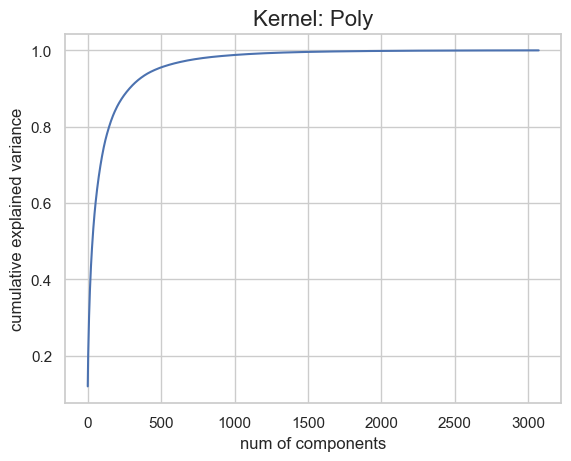

None

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style='whitegrid')
plt.plot(np.cumsum(explained_variance_ratio.numpy()))
plt.title('Kernel: Poly', fontsize=16)
plt.xlabel('num of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

In [210]:
import pandas as pd

evr = explained_variance_ratio.numpy()
crv = np.cumsum(explained_variance_ratio.numpy())
kpca_df  = pd.DataFrame()
kpca_df['cumsum_explained_var'] = crv
kpca_df['explainde_var_ratio'] = evr

In [211]:
# Get the indexes where cumsum_explained_var > 0.95
indexes = kpca_df[kpca_df['cumsum_explained_var'] > 0.95].index.tolist()

print("Indexes where cumsum_explained_var > 0.95:", indexes)

Indexes where cumsum_explained_var > 0.95: [464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 6

In [212]:
# Get the indexes where cumsum_explained_var > 0.99
indexes = kpca_df[kpca_df['cumsum_explained_var'] > 0.99].index.tolist()

print("Indexes where cumsum_explained_var > 0.99:", indexes)

Indexes where cumsum_explained_var > 0.99: [1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 12

n_componenets = 464, διατήρηση πληροφορίας μεγαλύτερη του 95%

n_componenets = 1081, διατήρηση πληροφορίας μεγαλύτερη του 99%

95%

In [ ]:
from KPCA_LDA_v2.utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=464, kernel_type='linear')#, gamma=a
kpca.fit(x_train_t)
X_kpca = kpca.transform(x_train_t)
X_test_kpca = kpca.transform(x_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA2.py:133: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-4.0595e-02, -1.4052e-02, -1.2697e-02,  ..., -5.9759e-06,
        -5.5197e-06, -2.2051e-06])
  warnings.warn(


The shape of train after xkpca  torch.Size([5000, 464])
The shape of test after xkpca  torch.Size([1000, 464])
---- KPCA took  10406  ms----


In [214]:
from sklearn.metrics import accuracy_score
from utils_ import _models

NC = _models.NearestCentroid()
NC.fit(X_kpca, y_train_t)
# Predict the labels for the test set 
y_pred = NC.predict(X_test_kpca)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 28.40%


In [215]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_kpca.numpy(), y_train_m)
    score = knn.score(X_test_kpca.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 28.30% with n_neighbors = 12


99%

In [58]:
from KPCA_LDA_v2.utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=1658, kernel_type='linear')#, gamma=a
kpca.fit(x_train_t)
X_kpca = kpca.transform(x_train_t)
X_test_kpca = kpca.transform(x_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA2.py:172: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-1.4483e+04, -5.5531e+02, -4.8177e+02,  ..., -1.0987e+00,
        -9.3363e-01, -9.0945e-01])
  warnings.warn(


The shape of train after xkpca  torch.Size([5000, 1658])
The shape of test after xkpca  torch.Size([1000, 1658])
---- KPCA took  10875  ms----


In [59]:
from sklearn.metrics import accuracy_score
from utils_ import _models

NC = _models.NearestCentroid()
NC.fit(X_kpca, y_train_t)
# Predict the labels for the test set 
y_pred = NC.predict(X_test_kpca)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 28.30%


In [60]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_kpca.numpy(), y_train_m)
    score = knn.score(X_test_kpca.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 28.00% with n_neighbors = 12


#### kPCA+lda

95%

In [216]:
from utils_ import _lda as lda

LDA = lda.LDA()
LDA.fit(X_kpca, y_train_t)
X_lda = LDA.transform(X_kpca)
X_test_lda = LDA.transform(X_test_kpca)
X_lda.shape

c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_lda.py:145: RuntimeWarning: Negative eigenvalues encountered and removed: tensor([-8.0164e+00, -3.4124e+00, -1.9055e+00, -8.6087e-01, -8.1022e-01,
        -5.2856e-01, -4.2252e-01, -3.7017e-01, -2.1458e-01, -9.5241e-02,
        -7.6011e-02, -5.8367e-02, -4.8999e-02, -4.4321e-02, -3.1232e-02,
        -2.8871e-02, -2.6550e-02, -2.3769e-02, -2.0928e-02, -1.9963e-02,
        -1.7707e-02, -1.6185e-02, -1.4978e-02, -1.3990e-02, -1.2690e-02,
        -1.0380e-02, -1.0209e-02, -8.9096e-03, -8.4513e-03, -8.1683e-03,
        -7.7617e-03, -7.6193e-03, -6.9295e-03, -6.3187e-03, -5.9911e-03,
        -5.7812e-03, -5.2439e-03, -4.8363e-03, -4.6412e-03, -4.4875e-03,
        -4.2893e-03, -4.2061e-03, -3.8645e-03, -3.6316e-03, -3.5581e-03,
        -3.4230e-03, -3.3127e-03, -3.1408e-03, -3.1343e-03, -2.8407e-03,
        -2.7235e-03, -2.6841e-03, -2.6302e-03, -2.3972e-03, -2.3174e-03,
        -2.2935e-03, -2.1431e-03, -2.0910e-03, -1.9574e-03, -1.8971e-03,
    

torch.Size([5000, 9])

In [217]:
from utils_ import _models
from sklearn.metrics import accuracy_score

NC = _models.NearestCentroid()
NC.fit(X_lda, y_train_t)

# Predict the labels for the test set 
y_pred = NC.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 29.00%


In [218]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_lda.numpy(), y_train_m)
    score = knn.score(X_test_lda.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 35.80% with n_neighbors = 27


#### 99%

In [61]:
from utils_ import _lda as lda

LDA = lda.LDA()
LDA.fit(X_kpca, y_train_t)
X_lda = LDA.transform(X_kpca)
X_test_lda = LDA.transform(X_test_kpca)
X_lda.shape

c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_lda.py:145: RuntimeWarning: Negative eigenvalues encountered and removed: tensor([-1.1296e+02, -5.1165e+01, -2.6966e+01,  ..., -5.4808e-07,
        -3.7469e-07, -1.1727e-07])
  warnings.warn(f"Negative eigenvalues encountered and removed: {eigenvalues[eigenvalues < 0]}", RuntimeWarning)


torch.Size([5000, 9])

In [62]:
from utils_ import _models
from sklearn.metrics import accuracy_score

NC = _models.NearestCentroid()
NC.fit(X_lda, y_train_t)

# Predict the labels for the test set 
y_pred = NC.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 28.30%


In [63]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_lda.numpy(), y_train_m)
    score = knn.score(X_test_lda.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 35.30% with n_neighbors = 23


In [229]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time 
s_time=time.time()
param_grid = [{'C':[5, 7.5, 10, 12.5, 15], 'gamma':[1e-03,2.5e-03, 5e-03, 7.5e-03, 1e-02], 'kernel':['rbf']}]
grid = GridSearchCV(SVC(), param_grid, verbose=10)
grid.fit(X_lda.numpy(), y_train_m)
y_pred = grid.predict(X_test_lda.numpy())
f_time = time.time()
print(f'Durratio: {f_time-s_time}')
best_params = grid.best_params_
print(best_params)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START C=5, gamma=0.001, kernel=rbf...............................
[CV 1/5; 1/25] END C=5, gamma=0.001, kernel=rbf;, score=0.411 total time=   0.4s
[CV 2/5; 1/25] START C=5, gamma=0.001, kernel=rbf...............................
[CV 2/5; 1/25] END C=5, gamma=0.001, kernel=rbf;, score=0.426 total time=   0.4s
[CV 3/5; 1/25] START C=5, gamma=0.001, kernel=rbf...............................
[CV 3/5; 1/25] END C=5, gamma=0.001, kernel=rbf;, score=0.396 total time=   0.4s
[CV 4/5; 1/25] START C=5, gamma=0.001, kernel=rbf...............................
[CV 4/5; 1/25] END C=5, gamma=0.001, kernel=rbf;, score=0.411 total time=   0.4s
[CV 5/5; 1/25] START C=5, gamma=0.001, kernel=rbf...............................
[CV 5/5; 1/25] END C=5, gamma=0.001, kernel=rbf;, score=0.395 total time=   0.4s
[CV 1/5; 2/25] START C=5, gamma=0.0025, kernel=rbf..............................
[CV 1/5; 2/25] END C=5, gamma=0.0025, kernel=rb

In [230]:
#to swsto to apo panw
from sklearn import metrics
print(f'Accuracy: {metrics.accuracy_score(y_true=y_test, y_pred = y_pred)}')

Accuracy: 0.375


In [227]:
from sklearn import metrics
print(f'Accuracy: {metrics.accuracy_score(y_true=y_test, y_pred = y_pred)}')

Accuracy: 0.381


## kernel rbf

In [31]:
#the auto gamma in sklearn
a = 1 / x_test_t.shape[1]
g = 1e-05
print(a-g)

0.0003155208333333333


In [32]:
from utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=3072, kernel_type='rbf', gamma=g)
kpca.fit(x_train_t)
X_kpca = kpca.transform(x_train_t)
X_test_kpca = kpca.transform(x_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA.py:122: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-0.0003])
  warnings.warn(


The shape of train after xkpca  torch.Size([5000, 3072])
The shape of test after xkpca  torch.Size([1000, 3072])
---- KPCA took  11742  ms----


In [33]:
explained_variance = kpca.explained_var  
explained_variance_ratio = explained_variance / torch.sum(explained_variance)

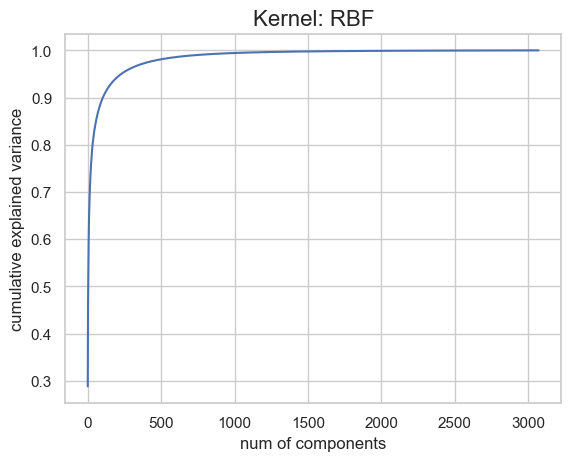

None

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style='whitegrid')
plt.plot(np.cumsum(explained_variance_ratio.numpy()))
plt.title('Kernel: RBF', fontsize=16)
plt.xlabel('num of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

In [263]:
import pandas as pd

evr = explained_variance_ratio.numpy()
crv = np.cumsum(explained_variance_ratio.numpy())
kpca_df  = pd.DataFrame()
kpca_df['cumsum_explained_var'] = crv
kpca_df['explainde_var_ratio'] = evr

In [264]:
# Get the indexes where cumsum_explained_var > 0.95
indexes = kpca_df[kpca_df['cumsum_explained_var'] > 0.95].index.tolist()

print("Indexes where cumsum_explained_var > 0.95:", indexes)

Indexes where cumsum_explained_var > 0.95: [228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 4

In [265]:
# Get the indexes where cumsum_explained_var > 0.99
indexes = kpca_df[kpca_df['cumsum_explained_var'] > 0.99].index.tolist()

print("Indexes where cumsum_explained_var > 0.99:", indexes)

Indexes where cumsum_explained_var > 0.99: [737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 9

n_componenets = 228, διατήρηση πληροφορίας μεγαλύτερη του 95%

n_componenets = 737, διατήρηση πληροφορίας μεγαλύτερη του 99%

95%

In [9]:
from utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=228, kernel_type='rbf', gamma=g)
kpca.fit(x_train_t)
X_kpca = kpca.transform(x_train_t)
X_test_kpca = kpca.transform(x_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA.py:122: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-0.0003])
  warnings.warn(


The shape of train after xkpca  torch.Size([5000, 228])
The shape of test after xkpca  torch.Size([1000, 228])
---- KPCA took  10498  ms----


In [267]:
from sklearn.metrics import accuracy_score
from utils_ import _models

NC = _models.NearestCentroid()
NC.fit(X_kpca, y_train_t)
# Predict the labels for the test set 
y_pred = NC.predict(X_test_kpca)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 28.50%


In [268]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_kpca.numpy(), y_train_m)
    score = knn.score(X_test_kpca.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 29.40% with n_neighbors = 20


99%

In [272]:
from KPCA_LDA_v2.utils_ import _kPCA
import time 

startKpca = int(round(time.time() * 1000))

print(" ")
print(" ---- STARTING custom KPCA ---- ")

kpca = _kPCA.KPCA(n_components=737, kernel_type='rbf', gamma=g)
kpca.fit(x_train_t)
X_kpca = kpca.transform(x_train_t)
X_test_kpca = kpca.transform(x_test_t)

print("The shape of train after xkpca ", X_kpca.shape )
print("The shape of test after xkpca ", X_test_kpca.shape )

# stop the kpca timer
endKpca = int(round(time.time() * 1000))

print("---- KPCA took ", (endKpca-startKpca), " ms----")

 
 ---- STARTING custom KPCA ---- 


c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_kPCA2.py:133: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-0.0003])
  warnings.warn(


The shape of train after xkpca  torch.Size([5000, 737])
The shape of test after xkpca  torch.Size([1000, 737])
---- KPCA took  10238  ms----


In [273]:
from sklearn.metrics import accuracy_score
from utils_ import _models

NC = _models.NearestCentroid()
NC.fit(X_kpca, y_train_t)
# Predict the labels for the test set 
y_pred = NC.predict(X_test_kpca)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 28.40%


In [274]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_kpca.numpy(), y_train_m)
    score = knn.score(X_test_kpca.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 28.10% with n_neighbors = 13


## kPCA+LDA

95%

In [10]:
from utils_ import _lda as lda

LDA = lda.LDA()
LDA.fit(X_kpca, y_train_t)
X_lda = LDA.transform(X_kpca)
X_test_lda = LDA.transform(X_test_kpca)
X_lda.shape

c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_lda.py:138: RuntimeWarning: Negative or near-zero eigenvalues encountered and removed: tensor([-3.5528e+00, -1.5735e+00, -8.6599e-01, -4.4938e-01, -4.0893e-01,
        -2.0894e-01, -1.6401e-01, -1.3673e-01, -9.7006e-02, -6.1901e-02,
        -5.0693e-02, -3.7419e-02, -3.5516e-02, -2.4544e-02, -2.3158e-02,
        -1.8318e-02, -1.4583e-02, -1.2259e-02, -1.0861e-02, -9.5671e-03,
        -9.2126e-03, -8.6596e-03, -7.7000e-03, -7.5525e-03, -6.7438e-03,
        -5.7444e-03, -5.3082e-03, -5.1262e-03, -4.7976e-03, -4.3645e-03,
        -4.1340e-03, -3.5132e-03, -3.3564e-03, -3.2719e-03, -3.0545e-03,
        -2.9216e-03, -2.8928e-03, -2.5744e-03, -2.3596e-03, -2.3061e-03,
        -2.2056e-03, -2.0061e-03, -1.9048e-03, -1.7745e-03, -1.6841e-03,
        -1.5955e-03, -1.5233e-03, -1.4786e-03, -1.3531e-03, -1.2572e-03,
        -1.2471e-03, -1.1901e-03, -1.1711e-03, -1.1265e-03, -1.0607e-03,
        -1.0251e-03, -9.0506e-04, -8.9073e-04, -8.7113e-04, -8.4

torch.Size([5000, 9])

In [270]:
from utils_ import _models
from sklearn.metrics import accuracy_score

NC = _models.NearestCentroid()
NC.fit(X_lda, y_train_t)

# Predict the labels for the test set 
y_pred = NC.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 30.20%


In [271]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_lda.numpy(), y_train_m)
    score = knn.score(X_test_lda.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 35.70% with n_neighbors = 27


99%

In [275]:
from utils_ import _lda as lda

LDA = lda.LDA()
LDA.fit(X_kpca, y_train_t)
X_lda = LDA.transform(X_kpca)
X_test_lda = LDA.transform(X_test_kpca)
X_lda.shape

c:\Users\dimos\PyProjecks\KPCA_LDA_v2\utils_\_lda.py:145: RuntimeWarning: Negative eigenvalues encountered and removed: tensor([-1.8760e+01, -9.1601e+00, -4.4852e+00, -2.2012e+00, -2.0446e+00,
        -1.3265e+00, -1.0100e+00, -8.5354e-01, -4.9707e-01, -1.4285e-01,
        -1.2610e-01, -1.0642e-01, -8.5703e-02, -7.1904e-02, -6.2371e-02,
        -6.0576e-02, -5.3567e-02, -4.5264e-02, -4.3124e-02, -4.2783e-02,
        -3.6109e-02, -3.4764e-02, -2.9631e-02, -2.6846e-02, -2.6032e-02,
        -2.3359e-02, -2.1604e-02, -1.9856e-02, -1.7462e-02, -1.7204e-02,
        -1.6237e-02, -1.5023e-02, -1.3797e-02, -1.2999e-02, -1.2567e-02,
        -1.1875e-02, -1.1575e-02, -1.0292e-02, -9.5931e-03, -9.3491e-03,
        -8.9775e-03, -8.7025e-03, -8.5283e-03, -8.0573e-03, -7.4938e-03,
        -7.2275e-03, -6.6368e-03, -6.2694e-03, -6.1706e-03, -6.0713e-03,
        -5.8208e-03, -5.5212e-03, -5.3413e-03, -5.0067e-03, -4.8712e-03,
        -4.6338e-03, -4.5543e-03, -4.2505e-03, -4.2122e-03, -4.1311e-03,
    

torch.Size([5000, 9])

In [276]:
from utils_ import _models
from sklearn.metrics import accuracy_score

NC = _models.NearestCentroid()
NC.fit(X_lda, y_train_t)

# Predict the labels for the test set 
y_pred = NC.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred.numpy()) 
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 28.70%


In [277]:
from sklearn.neighbors import KNeighborsClassifier as KNN

acc_KNN = []

for k in range(1,30):
    knn = KNN(n_neighbors=k, n_jobs=-1)

    knn.fit(X_lda.numpy(), y_train_m)
    score = knn.score(X_test_lda.numpy(), y_test)

    acc_KNN.append(score)

best_acc = max(acc_KNN)
best_k = acc_KNN.index(best_acc)
best_k_value = range(1,30)[best_k]

print(f'The best accuracy is {best_acc*100:.2f}% with n_neighbors = {best_k_value}')

The best accuracy is 36.40% with n_neighbors = 19


Για να δούμε τι γίνεται με το 95% της πληροφορίας στα svm

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time 
s_time=time.time()
param_grid = [{'C':[2.5, 5, 7.5, 10], 'gamma':[80,85, 90, 95], 'kernel':['rbf']}]
grid = GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_lda.numpy(), y_train_m)
y_pred = grid.predict(X_test_lda.numpy())
f_time = time.time()
print(f'Durratio: {f_time-s_time}')
best_params = grid.best_params_
print(best_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ........................C=2.5, gamma=80, kernel=rbf; total time=   0.4s
[CV] END ........................C=2.5, gamma=80, kernel=rbf; total time=   0.4s
[CV] END ........................C=2.5, gamma=80, kernel=rbf; total time=   0.4s
[CV] END ........................C=2.5, gamma=80, kernel=rbf; total time=   0.4s
[CV] END ........................C=2.5, gamma=80, kernel=rbf; total time=   0.4s
[CV] END ........................C=2.5, gamma=85, kernel=rbf; total time=   0.4s
[CV] END ........................C=2.5, gamma=85, kernel=rbf; total time=   0.4s
[CV] END ........................C=2.5, gamma=85, kernel=rbf; total time=   0.4s
[CV] END ........................C=2.5, gamma=85, kernel=rbf; total time=   0.4s
[CV] END ........................C=2.5, gamma=85, kernel=rbf; total time=   0.4s
[CV] END ........................C=2.5, gamma=90, kernel=rbf; total time=   0.4s
[CV] END ........................C=2.5, gamma=90

In [14]:
from sklearn import metrics
print(f'Accuracy: {metrics.accuracy_score(y_true=y_test, y_pred = y_pred)}')

Accuracy: 0.381


Για να δούμε τι γίνεται με το 99% της πληροφορίας στα svm

In [288]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time 
s_time=time.time()
param_grid = [{'C':[2.5, 5, 7.5, 10], 'gamma':[65, 70,75,80,85], 'kernel':['rbf']}]
grid = GridSearchCV(SVC(), param_grid, verbose=10)
grid.fit(X_lda.numpy(), y_train_m)
y_pred = grid.predict(X_test_lda.numpy())
f_time = time.time()
print(f'Durratio: {f_time-s_time}')
best_params = grid.best_params_
print(best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START C=2.5, gamma=65, kernel=rbf................................
[CV 1/5; 1/20] END .C=2.5, gamma=65, kernel=rbf;, score=0.398 total time=   0.4s
[CV 2/5; 1/20] START C=2.5, gamma=65, kernel=rbf................................
[CV 2/5; 1/20] END .C=2.5, gamma=65, kernel=rbf;, score=0.417 total time=   0.4s
[CV 3/5; 1/20] START C=2.5, gamma=65, kernel=rbf................................
[CV 3/5; 1/20] END .C=2.5, gamma=65, kernel=rbf;, score=0.398 total time=   0.4s
[CV 4/5; 1/20] START C=2.5, gamma=65, kernel=rbf................................
[CV 4/5; 1/20] END .C=2.5, gamma=65, kernel=rbf;, score=0.416 total time=   0.4s
[CV 5/5; 1/20] START C=2.5, gamma=65, kernel=rbf................................
[CV 5/5; 1/20] END .C=2.5, gamma=65, kernel=rbf;, score=0.390 total time=   0.4s
[CV 1/5; 2/20] START C=2.5, gamma=70, kernel=rbf................................
[CV 1/5; 2/20] END .C=2.5, gamma=70, kernel=rbf

In [289]:
from sklearn import metrics
print(f'Accuracy: {metrics.accuracy_score(y_true=y_test, y_pred = y_pred)}')

Accuracy: 0.374


### for me 

In [126]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=3072, kernel='rbf', gamma=g, remove_zero_eig=True)#, gamma=a
X_transformed = transformer.fit_transform(x_train_m)

In [127]:
eigenvalues = transformer.eigenvalues_
explained_variance = eigenvalues / eigenvalues.sum()
explained_variance_ratio = explained_variance / np.sum(explained_variance)
cumulative_explained_variance = np.cumsum(explained_variance)

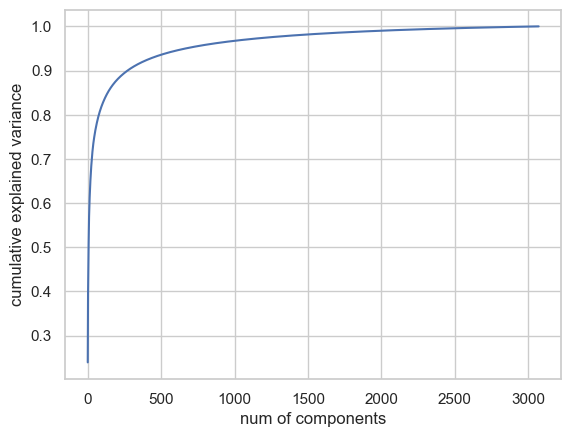

None

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
plt.plot(np.cumsum(explained_variance))
plt.xlabel('num of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

In [129]:
import pandas as pd

evr = explained_variance
crv = np.cumsum(explained_variance)
kpca_df  = pd.DataFrame()
kpca_df['cumsum_explained_var'] = crv
kpca_df['explainde_var_ratio'] = evr

In [130]:
# Get the indexes where cumsum_explained_var > 0.95
indexes = kpca_df[kpca_df['cumsum_explained_var'] > 0.95].index.tolist()

print("Indexes where cumsum_explained_var > 0.95:", indexes)

Indexes where cumsum_explained_var > 0.95: [667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 8

In [131]:
# Get the indexes where cumsum_explained_var > 0.99
indexes = kpca_df[kpca_df['cumsum_explained_var'] > 0.99].index.tolist()

print("Indexes where cumsum_explained_var > 0.95:", indexes)

Indexes where cumsum_explained_var > 0.95: [1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 21

In [132]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=2915, kernel='rbf', gamma=g)#, gamma=a
X_transformed = transformer.fit_transform(x_train_m)
X_test_kpca = transformer.transform(x_test)
print(X_transformed.shape, X_test_kpca.shape)

(5000, 2915) (1000, 2915)


In [133]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(X_transformed, y_train_m)
# print(f'Nearset Centroid training time: {f_t - s_t} sec')

score = clf.score(X_test_kpca, y_test)
# print(f'Nearset Centroid test time: {f_t - s_t} sec')

print(f'Accuracy for Nearset Centroid is, acc = {round(score*100,2)}')

Accuracy for Nearset Centroid is, acc = 29.5
